In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import skewnorm


In [58]:
df = pd.read_csv('problem_filter.csv', index_col=False)
df['vnd/m2'] = df['price_vnd']/df['square']
df.sort_values('latitude')

,id,square,price_vnd,latitude,longitude,vnd/m2
954,954,30,5500000,15.972080,108.261003,183333.333333
331,331,35,5500000,15.976094,108.260996,157142.857143
355,355,40,3000000,15.979429,108.249375,75000.000000
770,770,20,2000000,15.979484,108.250034,100000.000000
1042,1042,20,2200000,15.979484,108.250034,110000.000000
...,...,...,...,...,...,...
839,839,45,7500000,16.103408,108.262256,166666.666667
479,479,35,7000000,16.103611,108.261516,200000.000000
478,478,35,6500000,16.103611,108.261516,185714.285714
975,975,30,2500000,16.104051,108.259149,83333.333333


Text(0.5, 1.0, 'House Distribution')

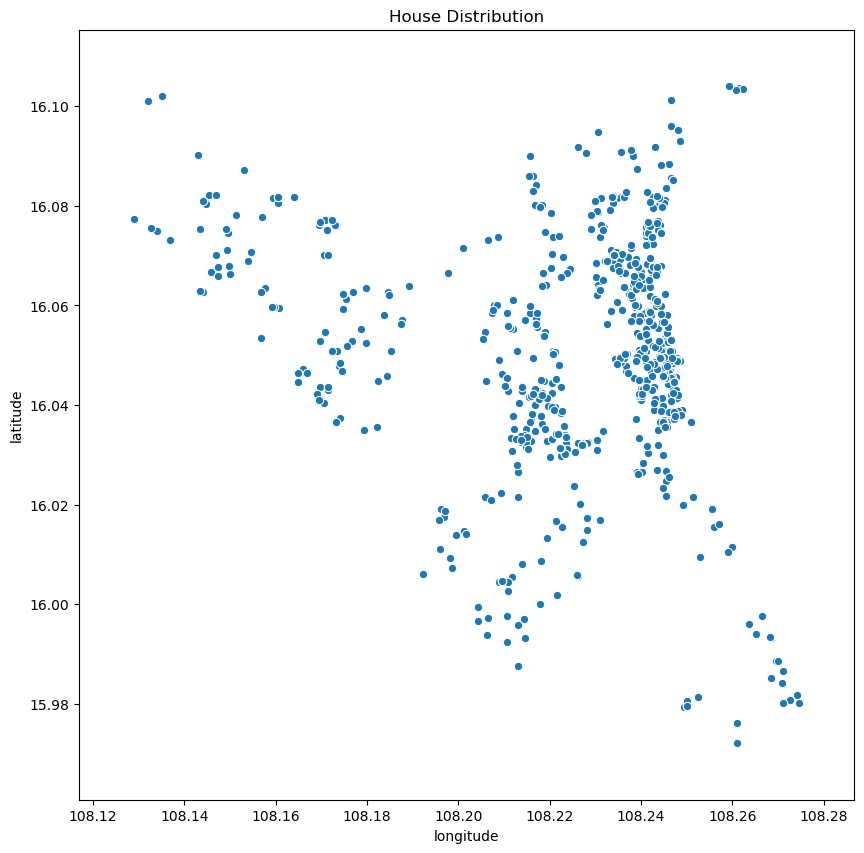

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.title('House Distribution')

In [62]:
X = np.array(df[['longitude', 'latitude']].astype(float))
weights = np.array(df['vnd/m2'])

In [63]:
K=3
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=1000)
wt_kmeansclus = kmeans.fit(X,sample_weight = weights)
predicted_kmeans = kmeans.predict(X, sample_weight = weights)
centers = wt_kmeansclus.cluster_centers_

Text(0, 0.5, 'longitude')

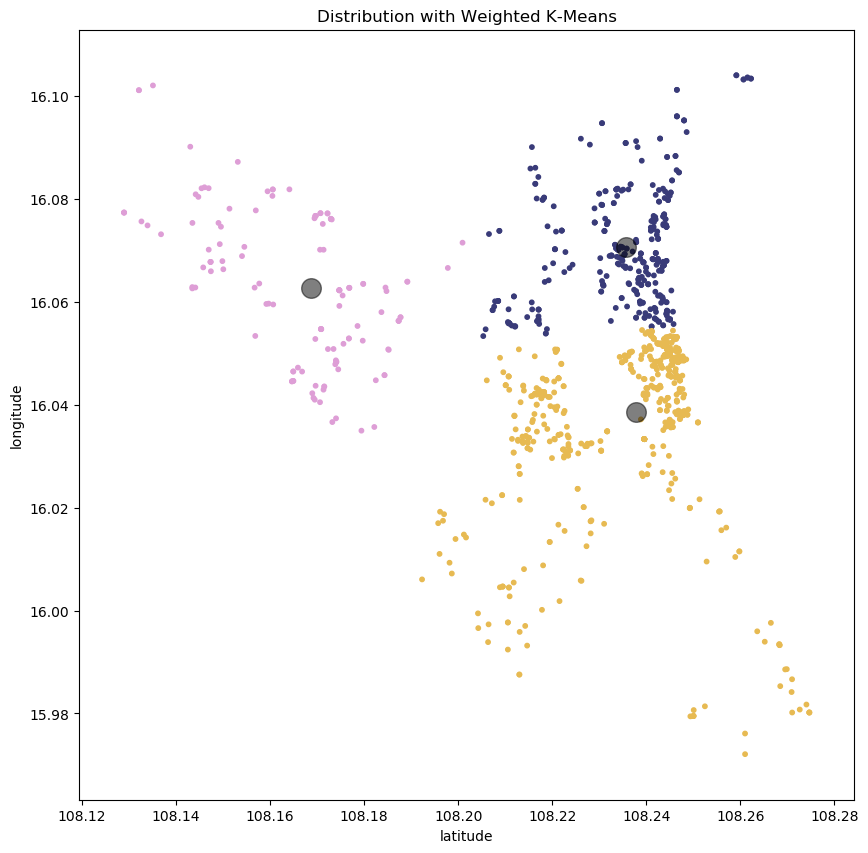

In [64]:
plt.style.use('default')
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], c=wt_kmeansclus.labels_.astype(float), s=10, cmap='tab20b')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('Distribution with Weighted K-Means')
plt.xlabel('latitude')
plt.ylabel('longitude')

In [65]:
K=3
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=1000)
kmeansclus_nw = kmeans.fit(X)
predicted_kmeans_nw = kmeans.predict(X)
centers_nw = kmeansclus_nw.cluster_centers_

Text(0, 0.5, 'longitude')

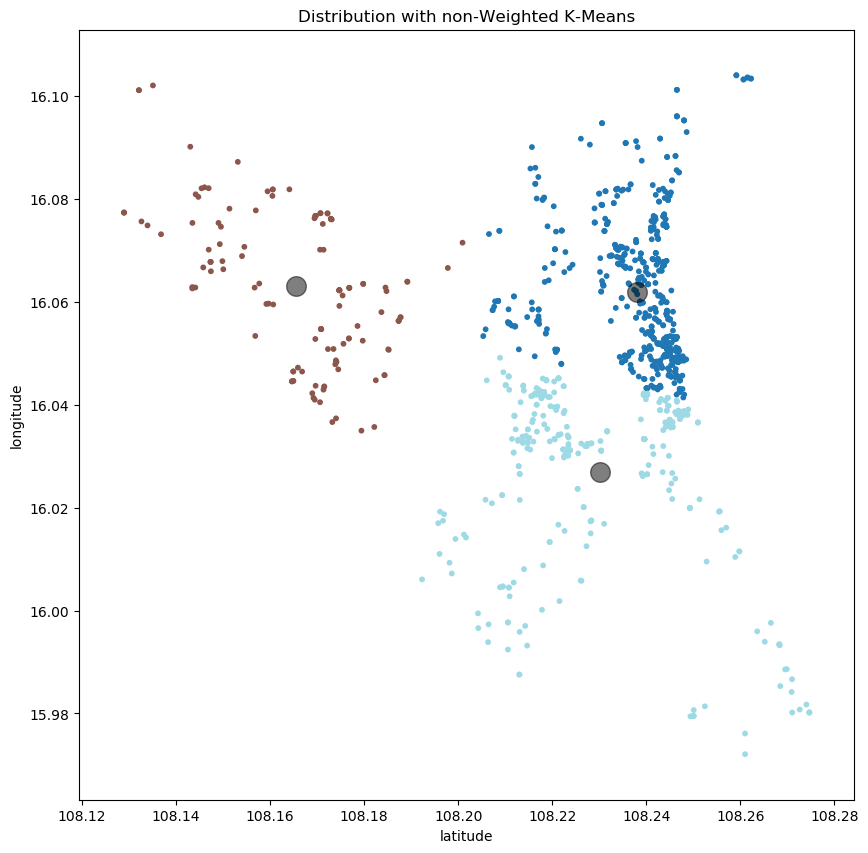

In [66]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=predicted_kmeans_nw, s=10, cmap='tab20')
plt.scatter(centers_nw[:, 0], centers_nw[:, 1], c='black', s=200, alpha=0.5)

plt.title('Distribution with non-Weighted K-Means')
plt.xlabel('latitude')
plt.ylabel('longitude')

<Figure size 1800x1800 with 0 Axes>

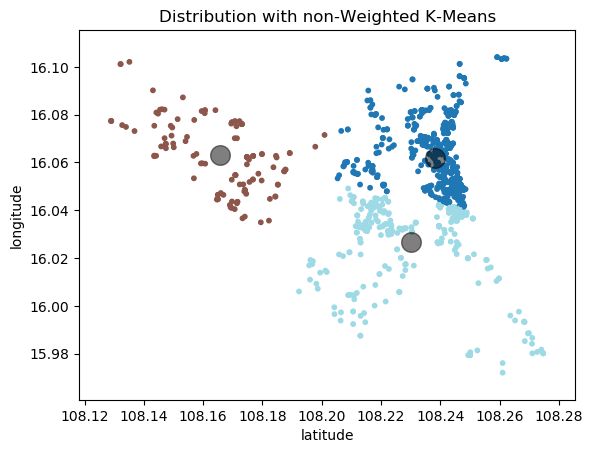

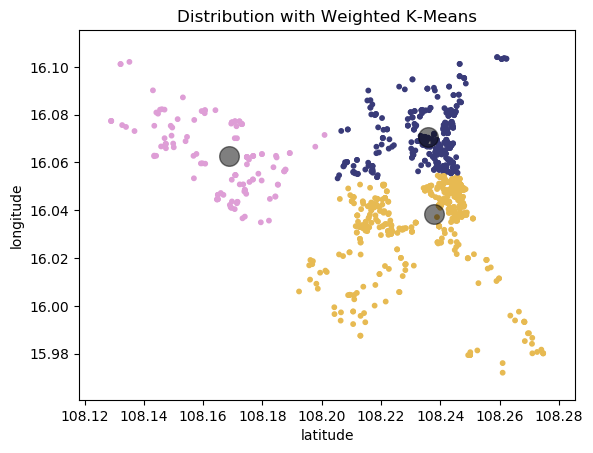

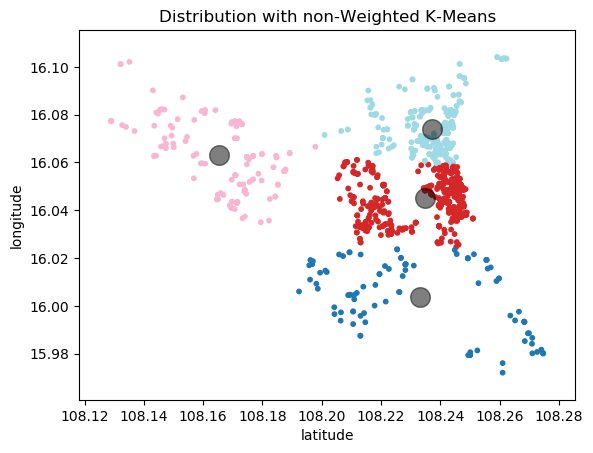

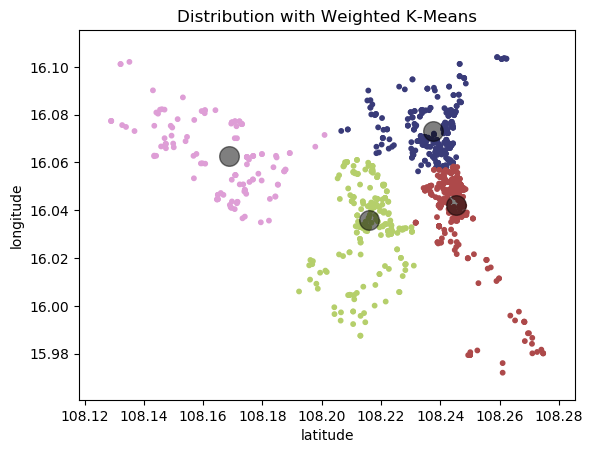

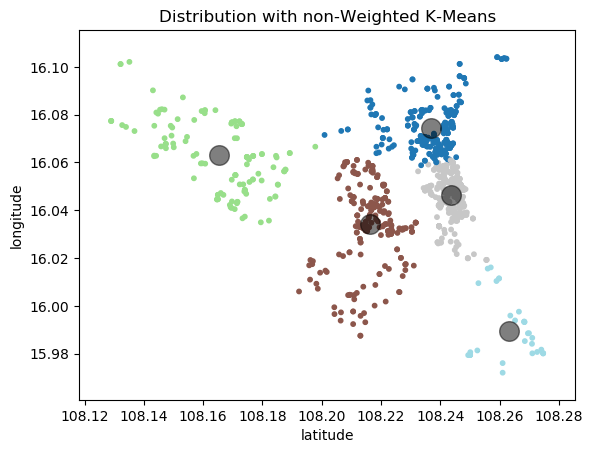

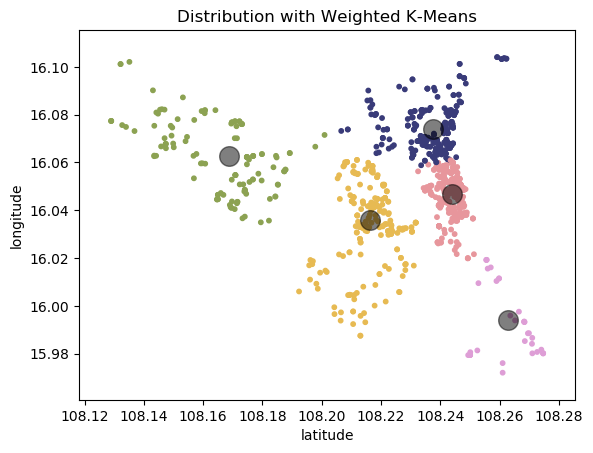

In [67]:
plt.figure(figsize=(18, 18))
for K in range(3,6):
    # Plot non-weighted clustering
    kmeans = KMeans(n_clusters=K, random_state=0, max_iter=1000)
    kmeansclus_nw = kmeans.fit(X)
    predicted_kmeans_nw = kmeans.predict(X)
    centers_nw = kmeansclus_nw.cluster_centers_
    
    plt.subplots()
    plt.scatter(X[:, 0], X[:, 1], c=predicted_kmeans_nw, s=10, cmap='tab20')
    plt.scatter(centers_nw[:, 0], centers_nw[:, 1], c='black', s=200, alpha=0.5)
    plt.title('Distribution with non-Weighted K-Means')
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    
    # Plot weighted clustering
    kmeans = KMeans(n_clusters=K, random_state=0, max_iter=1000)
    wt_kmeansclus = kmeans.fit(X,sample_weight = weights)
    predicted_kmeans = kmeans.predict(X, sample_weight = weights)
    centers = wt_kmeansclus.cluster_centers_

    plt.subplots()
    plt.scatter(X[:,0], X[:,1], c=wt_kmeansclus.labels_.astype(float), s=10, cmap='tab20b')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title('Distribution with Weighted K-Means')
    plt.xlabel('latitude')
    plt.ylabel('longitude')